In [11]:

%pip install folium matplotlib mapclassify

  Using cached folium-0.13.0-py2.py3-none-any.whl (96 kB)
  Using cached branca-0.5.0-py3-none-any.whl (24 kB)
     |████████████████████████████████| 133 kB 8.6 MB/s eta 0:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     |████████████████████████████████| 34.3 MB 652 kB/s eta 0:00:01     |███████████████                 | 16.1 MB 3.7 MB/s eta 0:00:05
     |████████████████████████████████| 2.0 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 7.8 MB/s eta 0:00:01     |███████████████████████         | 6.3 MB 7.8 MB/s eta 0:00:01
  Using cached MarkupSafe-2.1.1-cp39-cp39-macosx_10_9_x86_64.whl (13 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
     |████████████████████████████████| 297 kB 15.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/simoncen/.pyenv/versions/3.9.7/bin/python -m pip install --up

In [78]:

import matplotlib.pyplot as plt
import shapefile 
import geopandas as gpd  

#use geopandas to read the shapefile from datasets folder
gdf = gpd.read_file('../datasets/city_council_districts.shp')

#use geopandas and create a new gdf with only District 4
gdf4 = gdf[gdf['DISTRICT'] == '4']





,Unnamed: 0,latitude,longitude,business_name,street_address,ZIP_code,NAICS_2017_6digit_code,NAICS_2017_6digit_desc,NAICS_2017_2digit_code,NAICS_2017_2digit_desc,estimated_employment,employment_buckets,mainstreet
0,1,42.349398,-71.154065,zisis convenience store,375 Washington St,2135,452319,All Other General Merchandise Stores,45,Retail Trade,1,1 to 9,Brighton
1,2,42.350387,-71.165135,ziggy's,583 Washington St,2135,0,,99,Undefined,0,Not Available,Brighton
2,3,42.349219,-71.151769,zen zone acupuncture & spa,319 Washington St,2135,621399,Offices of All Other Miscellaneous Health Prac...,62,Healthcare and Social Assistance,2,1 to 9,Brighton
3,4,42.349465,-71.153117,yes nails & spa inc,416 Market St,2135,812113,Nail Salons,81,Other Services,3,1 to 9,Brighton
4,5,42.349453,-71.151543,xfinity,12 Wirt St,2135,515210,Cable and Other Subscription Programming,51,Information,13,10 to 24,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,42.349453,-71.151543,metro package delivery inc,12 Wirt St,2135,484110,"General Freight Trucking, Local",48,Transportation and Warehosuing,5,1 to 9,Brighton
96,97,42.349258,-71.153083,mdm noodles,351 Washington St,2135,722511,Full-Service Restaurants,72,Accommodation and Food Services,8,1 to 9,Brighton
97,98,42.348722,-71.153317,mcdevitt realty,8 Chestnut Hill Ave,2135,531110,Lessors of Residential Buildings and Dwellings,53,Real Estate Rental and Leasing,1,1 to 9,Brighton
98,99,42.349453,-71.151543,mcdermott realty associates,12 Wirt St,2135,531210,Offices of Real Estate Agents and Brokers,53,Real Estate Rental and Leasing,4,1 to 9,Brighton


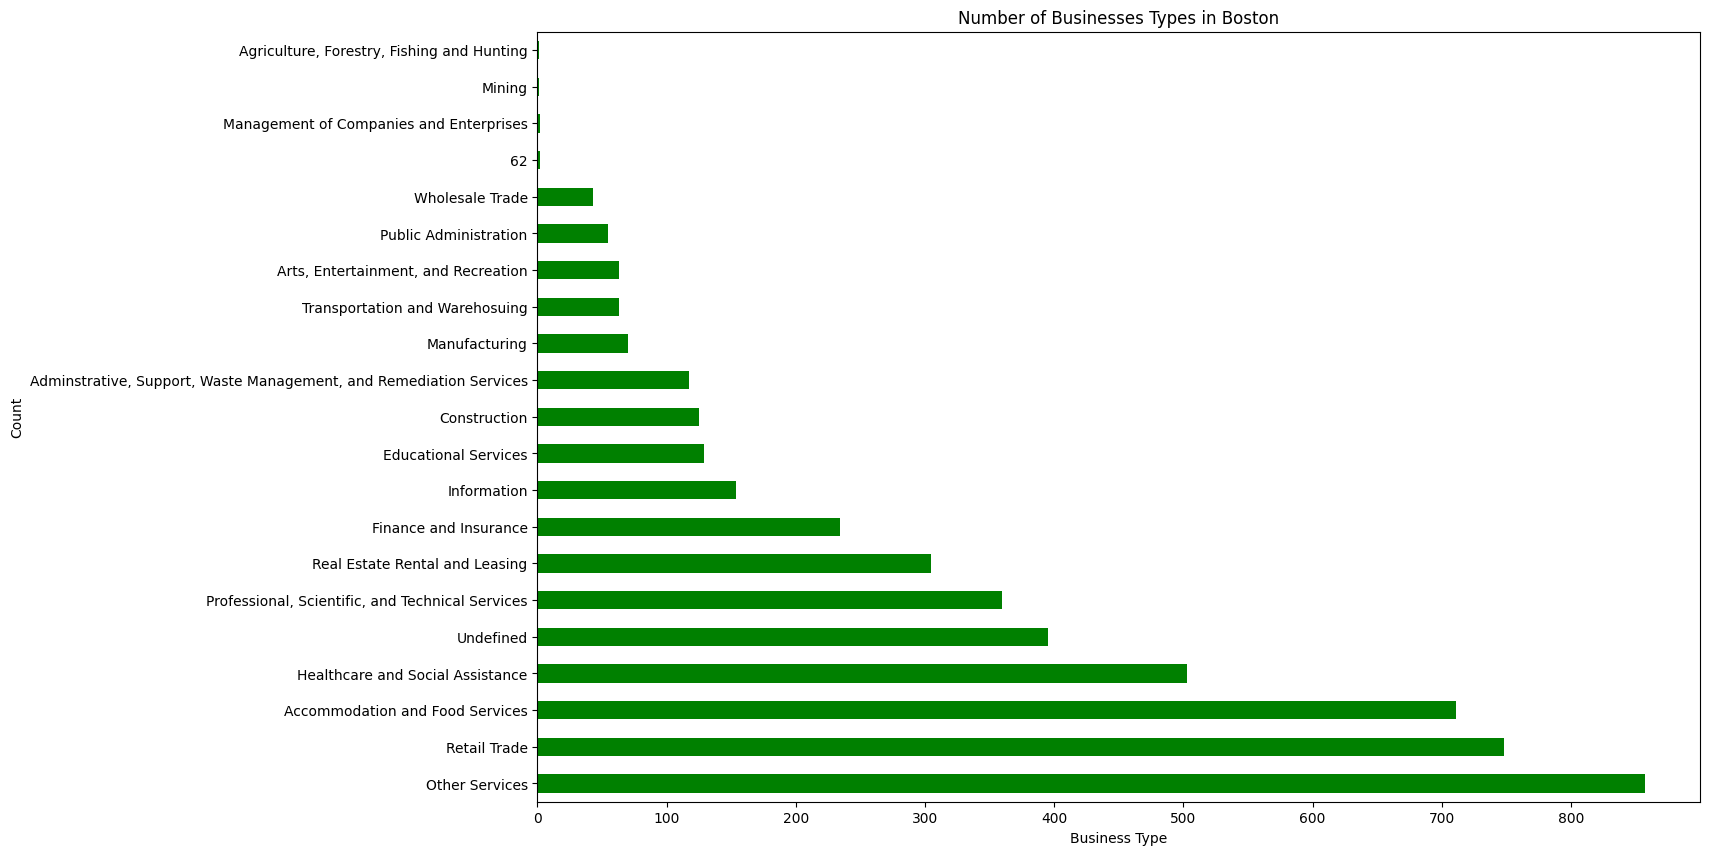

In [118]:
import pandas as pd

df = pd.read_csv('../datasets/MainStreets_Business_List.csv')
#drop all rows with NaN values
df = df.dropna()

df.head(100)

#plot the sun of  grouped by NAICS_2017_2digit_desc in descending order
df.groupby("NAICS_2017_2digit_desc")["NAICS_2017_2digit_desc"].count().sort_values(ascending=False).plot.barh(
    title = "Number of Businesses Types in Boston",
    color = "green",
    ylabel = "Count",
    xlabel = "Business Type",
    figsize = (15,10),
    rot = 0    
)

df.head(100)

<AxesSubplot: ylabel='ZIP_code'>

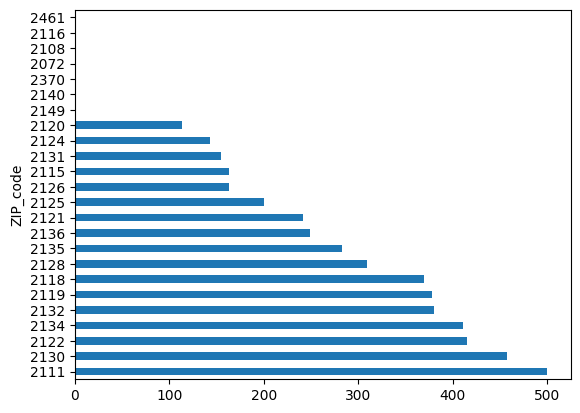

In [120]:
df = pd.read_csv('../datasets/MainStreets_Business_List.csv')
df = df.dropna()


district4Zips = [ '1747', '1748', '1757', '2019', '2030', '2035', '2038', '2048', '2052', '2053', '2054', '2056', 
'2062', '2067', '2071', '2072', '2081', '2093', '2115', '2130', '2135', '2215', '2346', '2347', '2356', '2357', '2375', 
'2445', '2446', '2457', '2458', '2459', '2460', '2461', '2462', '2464', '2465', '2466', '2467', '2468', '2472', '2481', 
'2482', '2492', '2494', '2702', '2703', '2715', '2717', '2718', '2720', '2721', '2723', '2725', '2726', '2760', '2762', 
'2763', '2764', '2766', '2767', '2769', '2771', '2777', '2779', '2780', '2790', '2861', '2914' ]

#plot by zip code in df
df.groupby("ZIP_code")["ZIP_code"].count().sort_values(ascending=False).plot.barh()

df = df[df['Zip_code'].isin(district4Zips)]
